# Basic functionality

**Prerequisites**

- [Pandas Intro](intro.ipynb)  


**Outcomes**

- Be familiar with `datetime`  
- Use built-in aggregation functions and be able to create your own and
  apply them using `agg`  
- Use built-in series transformation functions and be able to create your
  own and apply them using `apply`  
- Use built-in scalar transformation functions and be able to create your
  own and apply them using `applymap`  
- Be able to select subsets of the DataFrame using boolean selection  
- Know what the “want operator” is and how to apply it  


**Data**

- US state unemployment data from Bureau of Labor Statistics  

## Outline

- [Basic functionality](#Basic-functionality)  
  - [State unemployment Data](#State-unemployment-Data)  
  - [Dates in Pandas](#Dates-in-Pandas)  
  - [DataFrame aggregations](#DataFrame-aggregations)  
  - [Transforms](#Transforms)  
  - [Boolean Selection](#Boolean-Selection)  
  - [Exercises](#Exercises)  

In [139]:
# Uncomment following line to install on colab
! pip install qeds

## State unemployment Data

In this lecture, we will use unemployment data by state at a monthly
frequency

In [140]:
import pandas as pd

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

pd.__version__

'0.25.1'

First, we will download the data directly from a url and read it into a pandas dataframe

In [141]:
## Load up the data -- this will take a couple seconds
url = "https://storage.googleapis.com/qeds/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

The pandas `read_csv` will figure out most of the datatypes of the underlying columns.  The
exception here is that the `parse_dates=["Date"]` is needed as a hint to pandas
to have it load up the `Date` column as a python datetime type,

We can see the basic structure of the downloaded data by getting the first 5 rows, which directly matches
the underlying CSV file

In [142]:
unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


Note that a row has a date, state, the size of the labor force, and then the unemployment rate

For our analysis, we want to look at the unemployment rate across different states over time, which
requires a transformation of the data along the lines of an Excel pivot-table

In [143]:
# Don't worry about the details here quite yet
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


Finally, we can filter it to look at a subset of the columns (i.e. “state” in this case)

In [144]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


When plotting, a dataframe knows the column and index names

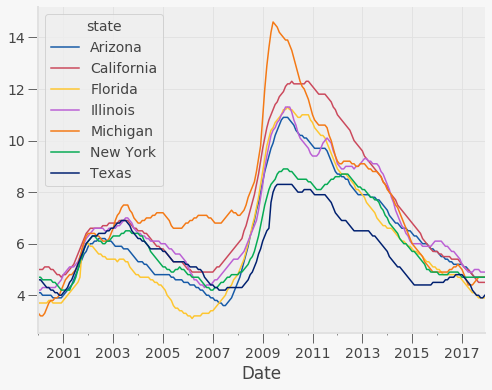

In [145]:
unemp.plot(figsize=(8, 6))


<a id='exercise-0'></a>
> See exercise 1 in the [*exercise list*](#exerciselist-0)

## Dates in Pandas

You might have noticed that our index now has a nice format for the
dates (`YYYY-MM-DD`) rather than just a year

This is because the `dtype` of the index is a variant of `datetime`

In [146]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

We can index into a DataFrame with a `DatetimeIndex` using string
representations of dates

For example

In [147]:
# Data corresponding to a single date
unemp.loc["01/01/2000", :]

state
Arizona       4.1
California    5.0
Florida       3.7
Illinois      4.2
Michigan      3.3
New York      4.7
Texas         4.6
Name: 2000-01-01 00:00:00, dtype: float64

In [148]:
# Data for all days between New Years Day and June first in the year 2000
unemp.loc["01/01/2000":"06/01/2000", :]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-06-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3


We will learn more about what Pandas can do with dates and times in an
upcoming lecture on time series data

## DataFrame aggregations

Let’s talk about *aggregations*

Loosely speaking, an aggregation is an operation that combines multiple
values into a single value

For example, computing the mean of three numbers (for example
`[0, 1, 2]`) returns a single number (1)

We will use aggregations extensively as we analyze and manipulate our data

Thankfully Pandas makes this easy!

### Built-in aggregations

Pandas already has some of the most frequently used aggregations built-in

For example:

- Mean  (`mean`)  
- Variance (`var`)  
- Standard deviation (`std`)  
- Minimum (`min`)  
- Median (`median`)  
- Maximum (`max`)  
- etc…  


>**Note**
>
>When looking for common operations, using “tab completion” goes a long way

In [149]:
unemp.mean()

state
Arizona       6.301389
California    7.299074
Florida       6.048611
Illinois      6.822685
Michigan      7.492593
New York      6.102315
Texas         5.695370
dtype: float64

As seen above, the default is for an aggregation to aggregate each column

However, by using the `axis` keyword argument, you can do aggregations by
row as well

In [150]:
unemp.var(axis=1).head()

Date
2000-01-01    0.352381
2000-02-01    0.384762
2000-03-01    0.364762
2000-04-01    0.353333
2000-05-01    0.294762
dtype: float64

### Writing your own aggregation

The built in aggregations will get us pretty far in our analysis, but
sometimes we need more flexibility

We can have Pandas perform custom aggregations by following these two
steps:

1. Write a Python function that takes a `Series` as an input and
  outputs a single value  
1. Call the `agg` method with our new function as an argument  


For example, below we will classify states as “low unemployment” or
“high unemployment” based on whether their mean unemployment level is
above or below 6.5

In [151]:
#
# Step 1: We write the (aggregation) function that we'd like to use
#
def high_or_low(s):
    """
    This function takes a Pandas Series object and returns high
    if the mean is above 6.5 and low if the mean is below 6.5
    """
    if s.mean() < 6.5:
        out = "Low"
    else:
        out = "High"

    return out

In [152]:
#
# Step 2: Apply it via the agg method
#
unemp.agg(high_or_low)

state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
dtype: object

In [153]:
# How does this differ from unemp.agg(high_or_low)?
unemp.agg(high_or_low, axis=1).head()

Date
2000-01-01    Low
2000-02-01    Low
2000-03-01    Low
2000-04-01    Low
2000-05-01    Low
dtype: object

Notice that `agg` can also accept multiple functions at once

In [154]:
unemp.agg([min, max, high_or_low])

,Arizona,California,Florida,Illinois,Michigan,New York,Texas
min,3.6,4.5,3.1,4.2,3.2,4.2,3.9
max,10.9,12.3,11.3,11.3,14.6,8.9,8.3
high_or_low,Low,High,Low,High,High,Low,Low



<a id='exercise-1'></a>
> See exercise 2 in the [*exercise list*](#exerciselist-0)

## Transforms

Many analytical operations do not necessarily involve an aggregation

The output of a function applied to a Series might need to be a new
Series

Some examples:

- Compute the percentage change in unemployment from month to month  
- Calculate the cumulative sum of elements in each column  

### Built-in transforms

Pandas comes with many transform functions including

- Cumulative sum/max/min/product (`cum(sum|min|max|prod)`)  
- Difference  (`diff`)  
- Elementwise addition/subtraction/multiplication/division (`+`, `-`, `*`, `/`)  
- Percent change (`pct_change`)  
- Number of occurrences of each distinct value (`value_counts`)  
- Absolute value (`abs`)  


Again, tab completion is helpful when trying to find these functions

In [155]:
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [156]:
unemp.pct_change().head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.00000,0.00,0.0,0.00000,-0.030303,0.000000,0.000000
2000-03-01,-0.02439,0.00,0.0,0.02381,0.000000,-0.021277,-0.021739
2000-04-01,0.00000,0.02,0.0,0.00000,0.031250,0.000000,-0.022222
2000-05-01,0.00000,0.00,0.0,0.00000,0.060606,0.000000,-0.022727


In [157]:
unemp.diff().head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.0,0.0,0.0,0.0,-0.1,0.0,0.0
2000-03-01,-0.1,0.0,0.0,0.1,0.0,-0.1,-0.1
2000-04-01,0.0,0.1,0.0,0.0,0.1,0.0,-0.1
2000-05-01,0.0,0.0,0.0,0.0,0.2,0.0,-0.1


Transforms can be split into to main categories:

1. *Series transforms*: functions that take in one series and produce another series. The index of the input and output does not need to be the same.  
1. *Scalar transforms*: functions that take a single value and produce a single value. An example is the `abs` method, or adding a constant to each value of a Series  

### Custom series transforms

Pandas also makes it easy to apply custom series transforms to a Series or the
columns of a DataFrame

1. Write a Python function that takes a Series and outputs a new Series  
1. Pass our new function as an argument to the `apply` method (alternatively, the `transform` method)  


As an example, we will standardize our unemployment data to have mean 0
and standard deviation 1

After doing this, we can use an aggregation to determine at which date the
unemployment rate is most different from “normal times” for each state

In [158]:
#
# Step 1: We write the series transform function that we'd like to use
#
def standardize_data(x):
    """
    Changes the data in a Series to become mean 0 with standard deviation 1
    """
    mu = x.mean()
    std = x.std()

    return (x - mu)/std

In [159]:
#
# Step 2: Apply our function via the apply method
#
std_unemp = unemp.apply(standardize_data)
std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.605740,-0.925962,-0.849345
2000-02-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.644039,-0.925962,-0.849345
2000-03-01,-1.125778,-0.935545,-0.976846,-1.286217,-1.644039,-0.991993,-0.926885
2000-04-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.605740,-0.991993,-1.004424
2000-05-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.529141,-0.991993,-1.081964


In [160]:
# Takes the absolute value of all elements of a function
abs_std_unemp = std_unemp.abs()

abs_std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,1.076861,0.935545,0.976846,1.337203,1.605740,0.925962,0.849345
2000-02-01,1.076861,0.935545,0.976846,1.337203,1.644039,0.925962,0.849345
2000-03-01,1.125778,0.935545,0.976846,1.286217,1.644039,0.991993,0.926885
2000-04-01,1.125778,0.894853,0.976846,1.286217,1.605740,0.991993,1.004424
2000-05-01,1.125778,0.894853,0.976846,1.286217,1.529141,0.991993,1.081964


In [161]:
# find the date when unemployment was "most different from normal" for each State
def idxmax(x):
    # idxmax of series will return index of maximal value
    return x.idxmax()

abs_std_unemp.agg(idxmax)

state
Arizona      2009-11-01
California   2010-03-01
Florida      2010-01-01
Illinois     2009-12-01
Michigan     2009-06-01
New York     2009-11-01
Texas        2009-08-01
dtype: datetime64[ns]

### Custom scalar transforms

As you may have predicted, we can also apply custom scalar transforms to our
pandas data

To do this we use the following pattern:

1. Define a python function that takes in a scalar and produces a scalar  
1. Pass this function as an argument to the `applymap` Series or DataFrame method  


Complete the exercise below to practice writing and using your own scalar
transforms


<a id='exercise-2'></a>
> See exercise 3 in the [*exercise list*](#exerciselist-0)

## Boolean Selection

We have seen how we can select subsets of data by referring to the index
or column names

However, often we want to do our selection based on conditions met by
the data itself

Some examples are

- Restrict analysis to all individuals older than 18  
- Look at data that corresponds to particular time periods  
- Analyze only data that corresponds to a recession  
- Obtain data for a specific product or customer ID  


We will be able to do this by using a Series or list of boolean values
to index into a Series or DataFrame

Let’s look at some examples

In [162]:
unemp_small = unemp.head()  # Create smaller data so we can see what's happening
unemp_small

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [163]:
# list of booleans selects rows
unemp_small.loc[[True, True, True, False, False]]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5


In [164]:
# second argument selects columns, the  ``:``  means "all".
# here we use it to select all columns
unemp_small.loc[[True, False, True, False, True], :]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [165]:
# can use booleans to select both rows and columns
unemp_small.loc[[True, True, True, False, False], [True, False, False, False, False, True, True]]

state,Arizona,New York,Texas
Date,,,
2000-01-01,4.1,4.7,4.6
2000-02-01,4.1,4.7,4.6
2000-03-01,4.0,4.6,4.5


### Creating Boolean DataFrames/Series

We can use [conditional statements](python_fundamentals/control_flow.ipynb) to
construct Series of booleans from our data

In [166]:
unemp_small["Texas"] < 4.5

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01     True
2000-05-01     True
Name: Texas, dtype: bool

Once we have our Series of bools, we can use it to extract subsets of
rows from our DataFrame

In [167]:
unemp_small.loc[unemp_small["Texas"] < 4.5]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [168]:
unemp_small["New York"] > unemp_small["Texas"]

Date
2000-01-01    True
2000-02-01    True
2000-03-01    True
2000-04-01    True
2000-05-01    True
dtype: bool

In [169]:
big_NY = unemp_small["New York"] > unemp_small["Texas"]
unemp_small.loc[big_NY]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


#### Multiple conditions

In the boolean section of the [basics lecture](python_fundamentals/basics.ipynb) we saw
that we can use the words `and` and `or` to combine multiple booleans into
a single bool

Recall

- `True and False -> False`  
- `True and True -> True`  
- `False and False -> False`  
- `True or False -> True`  
- `True or True -> True`  
- `False or False -> False`  


We can do something similar in Pandas, but instead of
`bool1 and bool2` we write

```python
(bool_series1) & (bool_series2)
```


Likewise, instead of `bool1 or bool2` we write

```python
(bool_series1) | (bool_series2)
```


In [170]:
small_NYTX = (unemp_small["Texas"] < 4.7) & (unemp_small["New York"] < 4.7)
small_NYTX

Date
2000-01-01    False
2000-02-01    False
2000-03-01     True
2000-04-01     True
2000-05-01     True
dtype: bool

In [171]:
unemp_small[small_NYTX]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


#### `isin`

Sometimes we will want to check whether a data point takes on one if a
fixed set of values

We could do this by writing `(df["x"] == val_1) | (df["x"] == val_2)`
(like we did above), but there is a better way: the `.isin` method

In [172]:
unemp_small["Michigan"].isin([3.3, 3.2])

Date
2000-01-01     True
2000-02-01     True
2000-03-01     True
2000-04-01     True
2000-05-01    False
Name: Michigan, dtype: bool

In [173]:
# now select full rows where this series is True
unemp_small.loc[unemp_small["Michigan"].isin([3.3, 3.2])]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4


#### `.any` and `.all`

Recall from the boolean section of the [basics lecture](python_fundamentals/basics.ipynb)
that the Python functions `any` and `all` are aggregation functions that
take a collection of booleans and return a single boolean

`any` returns True whenever at least one of the inputs are True while
`all` is True only when all the inputs are `True`

Series and DataFrames with `dtype` bool have `.any` and `.all`
methods that apply this logic to Pandas objects

Let’s use these methods to count how many months all the states in our
sample had high unemployment

As we work through this example, consider the [“want
operator”](http://albertjmenkveld.com/2014/07/07/endogeneous-price-dispersion/), a helpful
concept from Nobel Laureate [Tom
Sargent](http://www.tomsargent.com) for clearly stating the goal of our analysis and
determining the steps necessary to reach the goal

We always begin by writing `Want:` followed by what we want to
accomplish

In this case we would write

> Want: Count the number of months in which all states in our sample
had unemployment above 6.5%


After identifying the **want**, we work *backwards* to identify the
steps necessary to accomplish our goal

So, starting from the result, we have:

1. Sum the number of `True` values in a Series indicating dates for
  which all states had high unemployment  
1. Build the Series used in the last step by using the `.all` method
  on a DataFrame containing booleans indicating whether each state had
  high unemployment at each date  
1. Build the DataFrame used in the previous step using a `>`
  comparison  


Now that we have a clear plan, let’s follow through and *apply* the want
operator:

In [174]:
# Step 3: construct the DataFrame of bools
high = unemp > 6.5
high.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,False,False,False,False,False,False,False
2000-02-01,False,False,False,False,False,False,False
2000-03-01,False,False,False,False,False,False,False
2000-04-01,False,False,False,False,False,False,False
2000-05-01,False,False,False,False,False,False,False


In [175]:
# Step 2: use the .all method on axis=1 to get the dates where all states have a True
all_high = high.all(axis=1)
all_high.head()

Date
2000-01-01    False
2000-02-01    False
2000-03-01    False
2000-04-01    False
2000-05-01    False
dtype: bool

In [176]:
# Step 1: Call .sum to add up the number of True values in `all_high`
#         (note that True == 1 and False == 0 in Python, so .sum will count Trues)
msg = "Out of {} months, {} had high unemployment across all states"
print(msg.format(len(all_high), all_high.sum()))

Out of 216 months, 41 had high unemployment across all states



<a id='exercise-3'></a>
> See exercise 4 in the [*exercise list*](#exerciselist-0)

## Exercises


<a id='exerciselist-0'></a>
**Exercise 1**

Looking at the displayed DataFrame above, can you identify the index? The columns?

You can use the cell below to verify your visual intuition

In [177]:
print(unemp.index)
print(unemp.columns)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)
Index(['Arizona', 'California', 'Florida', 'Illinois', 'Michigan', 'New York',
       'Texas'],
      dtype='object', name='state')


([*back to text*](#exercise-0))columnsercise 2**

Do the following exercises in separate code cells below:

- At each date, what is the minimum unemployment rate across all states
  in our sample?  
- What was the median unemployment rate in each state?  
- What was the maximum unemployment rate across the states in our
  sample? What state did it happen in? In what month/year was this
  achieved?  
  - Hint 1: What Python type (not `dtype`) is returned by the
    aggregation?  
  - Hint 2: Read documentation for the method `idxmax`  
- Classify each state as high or low volatility based on whether the
  variance of their unemployment is above or below 4  

In [178]:
# min unemployment rate by state
unemp.min(axis=1)

Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64

In [179]:
# median unemployment rate by state
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

In [180]:
# unemp.loc[unemp.agg(idxmax)]
# unemp.max().max()

In [181]:
# max unemployment rate across all states and Year
state = unemp.max().agg(idxmax)
date = str(unemp.agg(idxmax)[state])[0:10]
max_un = unemp.max().max()
msg = '{} had the max U_Rate of {} in {}.'
print(msg.format(state,max_un,date))

Michigan had the max U_Rate of 14.6 in 2009-06-01.


In [182]:
# low or high volatility
def vol_regime(x):
    if x.var() > 4:
        out = 'high'
    else:
        out = 'low'
    return out
unemp.agg(vol_regime)

state
Arizona       high
California    high
Florida       high
Illinois       low
Michigan      high
New York       low
Texas          low
dtype: object

([*back to text*](#exercise-1))

**Exercise 3**

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month

1. Write a Python function that takes a single number as an input and
  outputs a single string noting if that number is high, medium, or low  
1. Pass your function to `applymap` (quiz: why `applymap` and not
  `agg` or `apply`?) and save the result in a new DataFrame called
  `unemp_bins`  
1. (Challenging) This exercise has multiple parts:  
  1. Use another transform on `unemp_bins` to count how many
    times each state had each of the three classifications.  
    - Hint 1: Will this value counting function be a series or scalar
      transform?  
    - Hint 2: Try googling "pandas count unique value" or something
      similar to find the right transform  
  1. Construct a horizontal bar chart of the number of occurrences of
    each level with one bar per state and classification (21 total
    bars)  
1. (Challenging) Repeat the previous step, but count how many states had
  each classification in each month. Which month had the most states
  with high unemployment? What about medium and low?  

In [183]:
# Part 1: Write a Python function to classify unemployment levels
def unem_classify(x):
    if x > 6.5:
        return 'high'
    elif x<=6.5 and x>4.5:
        return 'medium'
    else:
        return 'low'

In [184]:
# Part 2: Pass your function from part 1 to applymap
unemp_bins = unemp.applymap(unem_classify)
unemp_bins.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,low,medium,low,low,low,medium,medium
2000-02-01,low,medium,low,low,low,medium,medium
2000-03-01,low,medium,low,low,low,medium,low
2000-04-01,low,medium,low,low,low,medium,low
2000-05-01,low,medium,low,low,low,medium,low


state   Arizona  California  Florida  Illinois  Michigan  New York  Texas
high         75         106       68        91       142        65     51
low          44           4       69        19        17        22     58
medium       97         106       79       106        57       129    107


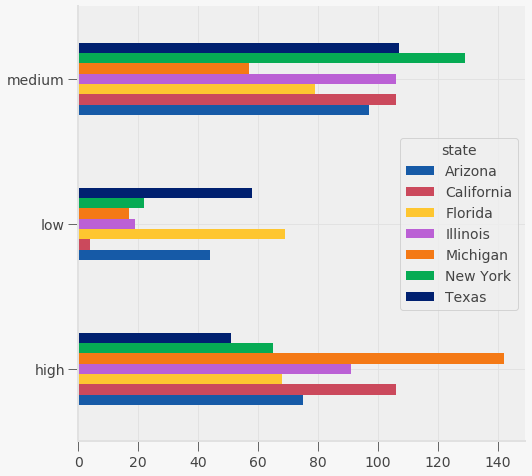

In [185]:
# Part 3: Count the number of times each state had each classification
def unique_count(x):
    return x.value_counts()
regime_count = unemp_bins.apply(unique_count)
print(regime_count)
regime_count.plot.barh(figsize=(8,8))
## then make a horizontal bar chart here

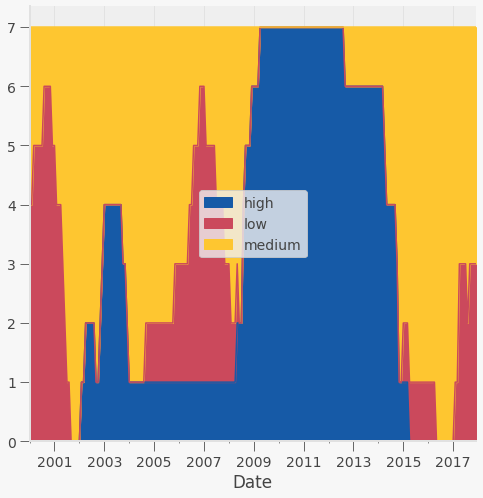

In [186]:
# Part 4: Apply the same transform from part 4, but to each date instead of to each state
unemp_bins.apply(unique_count,axis=1).plot(kind='area',stacked=True, figsize=(8,8))

([*back to text*](#exercise-2))

**Exercise 4**

- For a single state of your choice, determine what the mean
  unemployment is during "Low", "Medium", and "High" unemployment times
  (recall your `unemp_bins` DataFrame from the exercise above)  
  - Think about how you would do this for all the
    states in our sample and write your thoguhts... We will soon
    learn tools that will *greatly* simplify operations like
    this that operate on distinct *groups* of data at a time  
- Which states in our sample performs the best during "bad times?" To
  determine this, compute the mean unemployment for each state only for
  months in which the mean unemployment rate in our sample is greater
  than 7  


([*back to text*](#exercise-3))

In [187]:
Regimes = ['high','low','medium']

for i in Regimes:
    for x in states:
        msg = 'The mean unemployment in {} during the {} regime was {}'
        msg = msg.format(x,i,(unemp.loc[unemp_bins.loc[unemp_bins[x]==i].index][x].mean()))
        print(msg)

The mean unemployment in Arizona during the high regime was 8.733333333333334
The mean unemployment in California during the high regime was 9.249056603773585
The mean unemployment in Florida during the high regime was 9.155882352941179
The mean unemployment in Illinois during the high regime was 8.74065934065934
The mean unemployment in Michigan during the high regime was 8.762676056338028
The mean unemployment in New York during the high regime was 8.169230769230769
The mean unemployment in Texas during the high regime was 7.552941176470589
The mean unemployment in Arizona during the low regime was 4.0636363636363635
The mean unemployment in California during the low regime was 4.5
The mean unemployment in Florida during the low regime was 3.807246376811594
The mean unemployment in Illinois during the low regime was 4.35263157894737
The mean unemployment in Michigan during the low regime was 3.8764705882352946
The mean unemployment in New York during the low regime was 4.340909090909

In [210]:
bad_times = unemp > 7;
print(unemp.loc[bad_times.loc[bad_times.all(axis=1)==True].index].mean().max())
print(unemp.loc[bad_times.loc[bad_times.all(axis=1)==True].index].mean().agg(idxmax))

12.081818181818184
Michigan
